In [1]:
import xarray as xr
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

import cartopy.crs as ccrs

In [2]:
ds = pd.read_csv('data/GDP/interpolated_gld.20221202_104507')

bathy = xr.open_dataset('data/bathy/GEBCO_02_Dec_2022_8bb5cd71a07e/gebco_2022_n62.0_s59.0_w-49.0_e-40.0.nc')

In [3]:
id_drift= np.array([ds.iloc[i].values[0].split()[0] for i in range(len(ds))], dtype=int)
time = np.array([ds.iloc[i].values[0].split()[1] for i in range(len(ds))], dtype=np.datetime64)
speed = np.array([ds.iloc[i].values[0].split()[8] for i in range(len(ds))], dtype=float)
lon = np.array([ds.iloc[i].values[0].split()[4] for i in range(len(ds))], dtype=float)
lat = np.array([ds.iloc[i].values[0].split()[3] for i in range(len(ds))], dtype=float)

In [5]:
'Total number of drifters: ' +str(len(np.unique(id_drift)))

'Total number of drifters: 313'

Text(0.5, 0, 'Time')

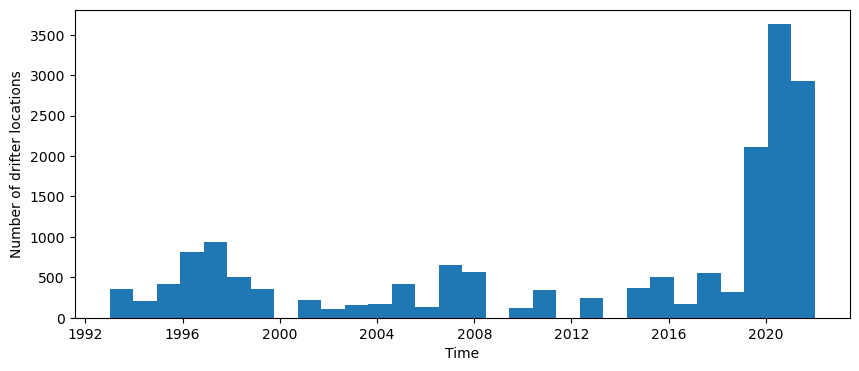

In [7]:
plt.figure(figsize=(10,4))
__ = plt.hist(time, bins=30)
plt.ylabel('Number of drifter locations')
plt.xlabel('Time')

In [8]:
start_time = np.array([time[id_drift == np.unique(id_drift)[i]][0] for i in range(len(np.unique(id_drift)))])
start_lon = np.array([lon[id_drift == np.unique(id_drift)[i]][0] for i in range(len(np.unique(id_drift)))])
start_lat = np.array([lat[id_drift == np.unique(id_drift)[i]][0] for i in range(len(np.unique(id_drift)))])

TypeError: 'PathCollection' object is not iterable

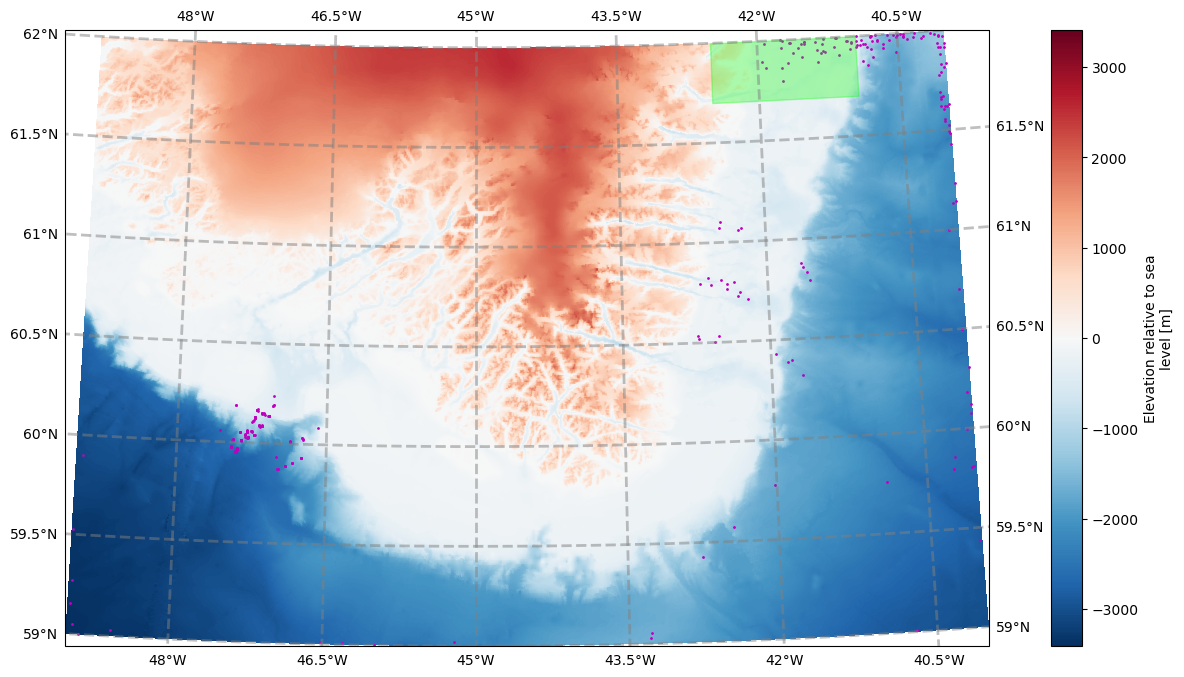

In [13]:
plt.figure(figsize=(16,8))
ax = plt.axes(projection=ccrs.Orthographic(-45, 60))
bathy.elevation.plot(ax=ax, transform=ccrs.PlateCarree())
sc = ax.scatter(start_lon, start_lat, s=1, c='m', transform=ccrs.PlateCarree(), label='Starting locations')

gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                  linewidth=2, color='gray', alpha=0.5, linestyle='--')

ax.fill_between([-42.5, -40.95], 61.7, 62, transform=ccrs.PlateCarree(), alpha=0.3, color='lime')

ax.legend(sc)

In [30]:
len(np.unique(idd)[(start_lon>-42.5)&(start_lon<-40.95)&(start_lat>61.7)])

35

In [31]:
good_ids = np.unique(idd)[(start_lon>-42.5)&(start_lon<-40.95)&(start_lat>61.7)]

In [ ]:
plt.figure(figsize=(16,8))
ax = plt.axes(projection=ccrs.Orthographic(-45, 60))
bathy.elevation.plot(ax=ax, transform=ccrs.PlateCarree())
ax.scatter(start_lon, start_lat, s=1, c='m', transform=ccrs.PlateCarree())

gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                  linewidth=2, color='gray', alpha=0.5, linestyle='--')

ax.fill_between([-42.5, -40.95], 61.7, 62, transform=ccrs.PlateCarree(), alpha=0.3, color='lime')

for i in range(len(good_ids)):
    ax.plot(lon[idd==good_ids[i]], lat[idd==good_ids[i]], transform=ccrs.PlateCarree(), label=good_ids[i])
    
plt.legend()